In [1]:
from importlib import reload
from IPython.core.interactiveshell import InteractiveShell
%load_ext autoreload
InteractiveShell.ast_node_interactivity = "all"
import logging
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(name)s - %(levelname)s - %(message)s"
)

In [2]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

2024-10-15 12:52:57,028 - numexpr.utils - INFO - Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2024-10-15 12:52:57,029 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


# Examine MQ evidence
- For 15 min gradient, number of MS2 scans per cycle: 1--> 20k, 2---> 24.5k, 3--> 26k; for 7.5 min gradient, number of MS2 scans per cycle: 1--> 12.5k, 2--> 15k, 3--> 16k; 2 MS2 per duty cycle seems optimal
- For 7.5 min gradient, the 2 concentration range do not differ significantly in terms of IDs, but if the 5to30 end up with much cleaner signals it could be useful
- MBR gains a lot of IDs, but not much in terms of unique precursors

## 15min_5to35

In [5]:
evidence_15min_5to35 = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/short_gradient/HeLa/15min_5to35/txt_15min_5to35/evidence.txt",
    sep="\t",
)
evidence_15min_5to35_unique_ion = evidence_15min_5to35.drop_duplicates(
    subset=["Sequence", "Charge", "Type", "Raw file"]
)
evidence_15min_5to35_unique_ion.value_counts(subset=["Raw file", "Type"])

/tmp/ipykernel_664729/2026251036.py:1: DtypeWarning: Columns (4,5,62,70) have mixed types. Specify dtype option on import or set low_memory=False.
  evidence_15min_5to35 = pd.read_csv(


Raw file                                               Type            
20240915_HeLa_DDA_2ug_15min_5to35_3R100ms_R1_1_1_6173  TIMS-MULTI-MSMS     26518
20240915_HeLa_DDA_2ug_15min_5to35_3R100ms_R2_1_1_6205  TIMS-MULTI-MSMS     26281
20240915_HeLa_DDA_2ug_15min_5to35_3R100ms_R3_1_1_6237  TIMS-MULTI-MSMS     26258
20240915_HeLa_DDA_2ug_15min_5to35_2R100ms_R3_1_1_6235  TIMS-MULTI-MSMS     24681
20240915_HeLa_DDA_2ug_15min_5to35_2R100ms_R1_1_1_6171  TIMS-MULTI-MSMS     24661
20240915_HeLa_DDA_2ug_15min_5to35_2R100ms_R2_1_1_6203  TIMS-MULTI-MSMS     24451
20240915_HeLa_DDA_2ug_15min_5to35_1R100ms_R1_1_1_6169  TIMS-MULTI-MSMS     20559
20240915_HeLa_DDA_2ug_15min_5to35_1R100ms_R3_1_1_6233  TIMS-MULTI-MSMS     20401
20240915_HeLa_DDA_2ug_15min_5to35_1R100ms_R2_1_1_6201  TIMS-MULTI-MSMS     20159
                                                       TIMS-MULTI-MATCH    13128
20240915_HeLa_DDA_2ug_15min_5to35_1R100ms_R3_1_1_6233  TIMS-MULTI-MATCH    12033
20240915_HeLa_DDA_2ug_15min_5to35_2R1

In [22]:
evidence_15min_5to35_one_raw_file = evidence_15min_5to35.loc[
    evidence_15min_5to35["Raw file"]
    == "20240915_HeLa_DDA_2ug_15min_5to35_1R100ms_R1_1_1_6169"
]

,,count,mean,std,min,25%,50%,75%,max
Raw file,Type,,,,,,,,
20240915_HeLa_DDA_2ug_15min_5to35_1R100ms_R1_1_1_6169,TIMS-MULTI-MSMS,20605.0,0.081002,0.027430,0.003552,0.064026,0.081728,0.096000,0.24889
20240915_HeLa_DDA_2ug_15min_5to35_1R100ms_R2_1_1_6201,TIMS-MULTI-MSMS,20199.0,0.080677,0.027369,0.003551,0.064019,0.078287,0.095996,0.24171
20240915_HeLa_DDA_2ug_15min_5to35_1R100ms_R3_1_1_6233,TIMS-MULTI-MSMS,20450.0,0.080901,0.027393,0.003550,0.064018,0.081728,0.096002,0.26310
20240915_HeLa_DDA_2ug_15min_5to35_2R100ms_R1_1_1_6171,TIMS-MULTI-MSMS,24723.0,0.084872,0.028348,0.005328,0.064063,0.080024,0.101310,0.33597
20240915_HeLa_DDA_2ug_15min_5to35_2R100ms_R2_1_1_6203,TIMS-MULTI-MSMS,24512.0,0.084916,0.028175,0.005326,0.064201,0.080029,0.101310,0.28271
20240915_HeLa_DDA_2ug_15min_5to35_2R100ms_R3_1_1_6235,TIMS-MULTI-MSMS,24740.0,0.084653,0.028368,0.005328,0.064039,0.080015,0.101300,0.33599
20240915_HeLa_DDA_2ug_15min_5to35_3R100ms_R1_1_1_6173,TIMS-MULTI-MSMS,26583.0,0.086180,0.030374,0.007104,0.064018,0.078285,0.099595,0.44079
20240915_HeLa_DDA_2ug_15min_5to35_3R100ms_R2_1_1_6205,TIMS-MULTI-MSMS,26344.0,0.086117,0.030541,0.007104,0.064016,0.078293,0.099602,0.37686
20240915_HeLa_DDA_2ug_15min_5to35_3R100ms_R3_1_1_6237,TIMS-MULTI-MSMS,26328.0,0.086404,0.030379,0.007104,0.064011,0.085278,0.099602,0.40535


/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


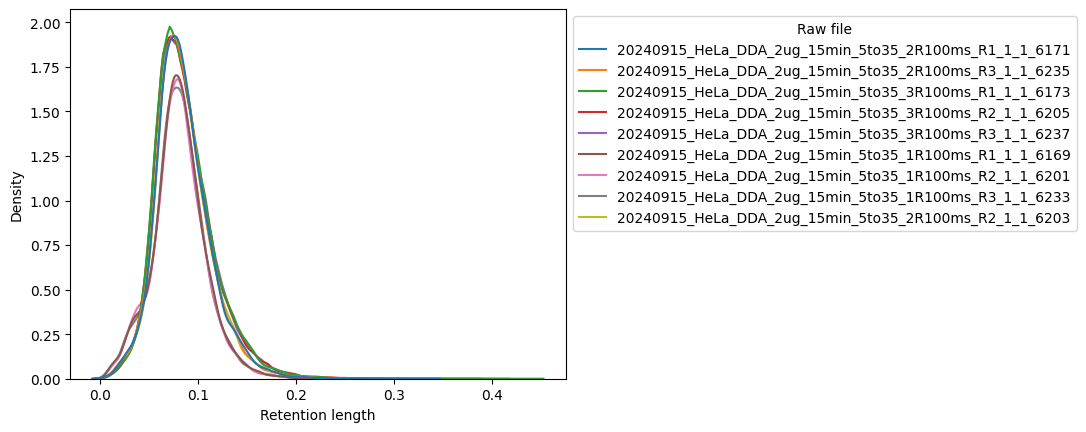

In [103]:
evidence_15min_5to35_unique_ion.loc[
    evidence_15min_5to35_unique_ion["Type"] == "TIMS-MULTI-MSMS"
].groupby(["Raw file", "Type"])["Retention length"].describe()
import seaborn as sns

import seaborn as sns
import matplotlib.pyplot as plt

# Create the KDE plot
ax = sns.kdeplot(
    evidence_15min_5to35_unique_ion.loc[
        evidence_15min_5to35_unique_ion["Type"] == "TIMS-MULTI-MSMS"
    ],
    x="Retention length",
    hue="Raw file",
    legend=True,
    # fill=True,
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
sns.kdeplot(
    evidence_30min_5to35_unique_ion.loc[
        evidence_30min_5to35_unique_ion["Type"] == "TIMS-MULTI-MSMS"
    ],
    x="Retention length",
    hue="Raw file",
    legend=False,
)

## 7min_5to30

In [69]:
evidence_7min_5to30 = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/short_gradient/HeLa/7min_5to30/txt_7min_5to30/evidence.txt",
    sep="\t",
)
evidence_7min_5to30_unique_ion = evidence_7min_5to30.drop_duplicates(
    subset=["Modified sequence", "Charge", "Raw file", "Type"]
)
evidence_7min_5to30_unique_ion.value_counts(subset=["Raw file", "Type"])

/tmp/ipykernel_726040/1378610295.py:1: DtypeWarning: Columns (4,5,62,63,70) have mixed types. Specify dtype option on import or set low_memory=False.
  evidence_7min_5to30 = pd.read_csv(


Raw file                                              Type            
20240915_HeLa_DDA_1ug_7min_5to30_3R100ms_R2_1_1_6231  TIMS-MULTI-MSMS     15987
20240915_HeLa_DDA_1ug_7min_5to30_3R100ms_R3_1_1_6255  TIMS-MULTI-MSMS     15799
20240915_HeLa_DDA_1ug_7min_5to30_3R100ms_R1_1_1_6199  TIMS-MULTI-MSMS     15762
20240915_HeLa_DDA_1ug_7min_5to30_2R100ms_R2_1_1_6229  TIMS-MULTI-MSMS     14913
20240915_HeLa_DDA_1ug_7min_5to30_2R100ms_R1_1_1_6197  TIMS-MULTI-MSMS     14831
20240915_HeLa_DDA_1ug_7min_5to30_2R100ms_R3_1_1_6254  TIMS-MULTI-MSMS     14611
20240915_HeLa_DDA_1ug_7min_5to30_1R100ms_R2_1_1_6227  TIMS-MULTI-MSMS     12362
20240915_HeLa_DDA_1ug_7min_5to30_1R100ms_R1_1_1_6195  TIMS-MULTI-MSMS     12205
20240915_HeLa_DDA_1ug_7min_5to30_1R100ms_R3_1_1_6253  TIMS-MULTI-MSMS     12135
                                                      TIMS-MULTI-MATCH        4
20240915_HeLa_DDA_1ug_7min_5to30_2R100ms_R1_1_1_6197  TIMS-MULTI-MATCH        4
20240915_HeLa_DDA_1ug_7min_5to30_2R100ms_R2_1_1_6

In [70]:
evidence_7min_5to30["exp_name"] = (
    evidence_7min_5to30["Raw file"].str.split("5to30_").str[1]
)
evidence_7min_5to30_ref = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/HeLa_sample_amount_and_LC_columns/7min_1ug_ref/txt/evidence.txt",
    sep="\t",
)
evidence_7min_5to30_ref["exp_name"] = (
    "5R100ms_" + evidence_7min_5to30_ref["Raw file"].str.split("7min_1ug_").str[1]
)
evidence_7min_5to30 = pd.concat([evidence_7min_5to30, evidence_7min_5to30_ref])
evidence_7min_5to30["log_intensity"] = np.log10(evidence_7min_5to30["Intensity"] + 1)
evidence_7min_5to30["exp_name"].value_counts()

/tmp/ipykernel_726040/2097539876.py:4: DtypeWarning: Columns (69) have mixed types. Specify dtype option on import or set low_memory=False.
  evidence_7min_5to30_ref = pd.read_csv(


exp_name
3R100ms_R1_1_1_6199      21692
1R100ms_R2_1_1_6227      21616
3R100ms_R3_1_1_6255      21606
3R100ms_R2_1_1_6231      21596
1R100ms_R3_1_1_6253      21546
2R100ms_R3_1_1_6254      21115
2R100ms_R1_1_1_6197      21058
2R100ms_R2_1_1_6229      20995
1R100ms_R1_1_1_6195      20732
5R100ms_R2_RA1_1_5148    17750
5R100ms_R3_RA1_1_5149    17640
5R100ms_R1_RA1_1_5147    17632
Name: count, dtype: int64

<Axes: xlabel='exp_name', ylabel='log_intensity'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '1R100ms_R1_1_1_6195'),
  Text(1, 0, '1R100ms_R2_1_1_6227'),
  Text(2, 0, '1R100ms_R3_1_1_6253'),
  Text(3, 0, '2R100ms_R1_1_1_6197'),
  Text(4, 0, '2R100ms_R3_1_1_6254'),
  Text(5, 0, '2R100ms_R2_1_1_6229'),
  Text(6, 0, '3R100ms_R1_1_1_6199'),
  Text(7, 0, '3R100ms_R2_1_1_6231'),
  Text(8, 0, '3R100ms_R3_1_1_6255'),
  Text(9, 0, '5R100ms_R2_RA1_1_5148'),
  Text(10, 0, '5R100ms_R3_RA1_1_5149'),
  Text(11, 0, '5R100ms_R1_RA1_1_5147')])

Text(0.5, 0, 'Experiment')

Text(0, 0.5, 'MaxQaunt Intensity (Log10)')

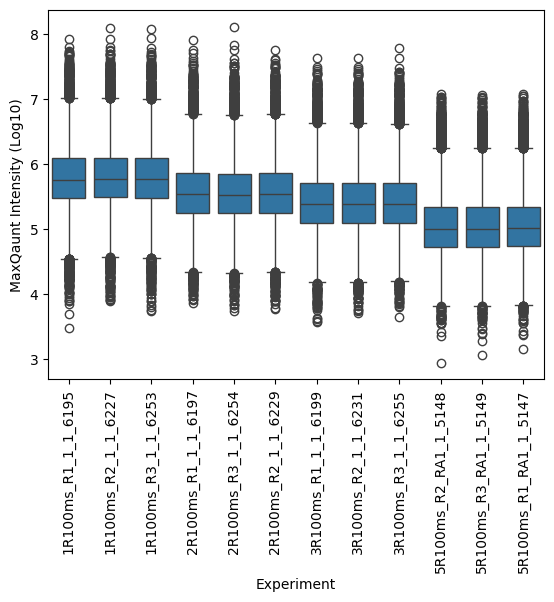

In [73]:
import seaborn as sns

sns.boxplot(
    data=evidence_7min_5to30.loc[evidence_7min_5to30["Type"] == "TIMS-MULTI-MSMS"],
    x="exp_name",
    y="log_intensity",
    order=[
        "1R100ms_R1_1_1_6195",
        "1R100ms_R2_1_1_6227",
        "1R100ms_R3_1_1_6253",
        "2R100ms_R1_1_1_6197",
        "2R100ms_R3_1_1_6254",
        "2R100ms_R2_1_1_6229",
        "3R100ms_R1_1_1_6199",
        "3R100ms_R2_1_1_6231",
        "3R100ms_R3_1_1_6255",
        "5R100ms_R2_RA1_1_5148",
        "5R100ms_R3_RA1_1_5149",
        "5R100ms_R1_RA1_1_5147",
    ],
)
plt.xticks(rotation=90)
plt.xlabel("Experiment")
plt.ylabel("MaxQaunt Intensity (Log10)")
for fig_format in ["svg", "png"]:
    plt.savefig(
        os.path.join(
            "/cmnfs/proj/ORIGINS/SWAPS_exp/SWAPS_paper_figures/",
            f"SWAPS_7min5to30_MQ_intensity_by_exp.{fig_format}",
        ),
        dpi=300,
        bbox_inches="tight",
    )

## 7min_5to35

In [100]:
evidence_7min_5to35 = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/short_gradient/HeLa/7min_5to35/txt_7min_5to35/evidence.txt",
    sep="\t",
)
evidence_7min_5to35_unique_ion = evidence_7min_5to35.drop_duplicates(
    subset=["Modified sequence", "Charge", "Raw file", "Type"]
)
evidence_7min_5to35_unique_ion.value_counts(subset=["Raw file", "Type"])

/tmp/ipykernel_559453/4084967740.py:1: DtypeWarning: Columns (4,5,62,70) have mixed types. Specify dtype option on import or set low_memory=False.
  evidence_7min_5to35 = pd.read_csv(


Raw file                                              Type            
20240915_HeLa_DDA_1ug_7min_5to35_3R100ms_R2_1_1_6225  TIMS-MULTI-MSMS     16359
20240915_HeLa_DDA_1ug_7min_5to35_3R100ms_R3_1_1_6252  TIMS-MULTI-MSMS     16109
20240915_HeLa_DDA_1ug_7min_5to35_3R100ms_R1_1_1_6193  TIMS-MULTI-MSMS     15962
20240915_HeLa_DDA_1ug_7min_5to35_2R100ms_R1_1_1_6191  TIMS-MULTI-MSMS     15192
20240915_HeLa_DDA_1ug_7min_5to35_2R100ms_R2_1_1_6223  TIMS-MULTI-MSMS     15106
20240915_HeLa_DDA_1ug_7min_5to35_2R100ms_R3_1_1_6251  TIMS-MULTI-MSMS     14975
20240915_HeLa_DDA_1ug_7min_5to35_1R100ms_R2_1_1_6221  TIMS-MULTI-MSMS     12591
20240915_HeLa_DDA_1ug_7min_5to35_1R100ms_R1_1_1_6189  TIMS-MULTI-MSMS     12485
20240915_HeLa_DDA_1ug_7min_5to35_1R100ms_R3_1_1_6250  TIMS-MULTI-MSMS     12437
                                                      TIMS-MULTI-MATCH        4
20240915_HeLa_DDA_1ug_7min_5to35_2R100ms_R2_1_1_6223  TIMS-MULTI-MATCH        4
20240915_HeLa_DDA_1ug_7min_5to35_3R100ms_R2_1_1_6

,,count,mean,std,min,25%,50%,75%,max
Raw file,Type,,,,,,,,
20240915_HeLa_DDA_1ug_7min_5to35_1R100ms_R1_1_1_6189,TIMS-MULTI-MSMS,12485.0,0.068463,0.021943,0.003552,0.053354,0.067529,0.081734,0.20621
20240915_HeLa_DDA_1ug_7min_5to35_1R100ms_R2_1_1_6221,TIMS-MULTI-MSMS,12591.0,0.068513,0.021870,0.003551,0.053353,0.067534,0.081739,0.23813
20240915_HeLa_DDA_1ug_7min_5to35_1R100ms_R3_1_1_6250,TIMS-MULTI-MSMS,12437.0,0.068899,0.021991,0.007107,0.053391,0.067534,0.081744,0.20275
20240915_HeLa_DDA_1ug_7min_5to35_2R100ms_R1_1_1_6191,TIMS-MULTI-MSMS,15192.0,0.069967,0.023811,0.005330,0.053335,0.069291,0.085282,0.24534
20240915_HeLa_DDA_1ug_7min_5to35_2R100ms_R2_1_1_6223,TIMS-MULTI-MSMS,15106.0,0.070606,0.024094,0.005329,0.053344,0.069301,0.085297,0.29332
20240915_HeLa_DDA_1ug_7min_5to35_2R100ms_R3_1_1_6251,TIMS-MULTI-MSMS,14975.0,0.070058,0.023824,0.005329,0.053340,0.069296,0.085291,0.22400
20240915_HeLa_DDA_1ug_7min_5to35_3R100ms_R1_1_1_6193,TIMS-MULTI-MSMS,15962.0,0.069528,0.025903,0.007104,0.049795,0.064017,0.085305,0.26310
20240915_HeLa_DDA_1ug_7min_5to35_3R100ms_R2_1_1_6225,TIMS-MULTI-MSMS,16359.0,0.069802,0.026110,0.007105,0.049800,0.064025,0.085301,0.24937
20240915_HeLa_DDA_1ug_7min_5to35_3R100ms_R3_1_1_6252,TIMS-MULTI-MSMS,16109.0,0.070326,0.026073,0.007101,0.049818,0.064043,0.085330,0.25600


/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


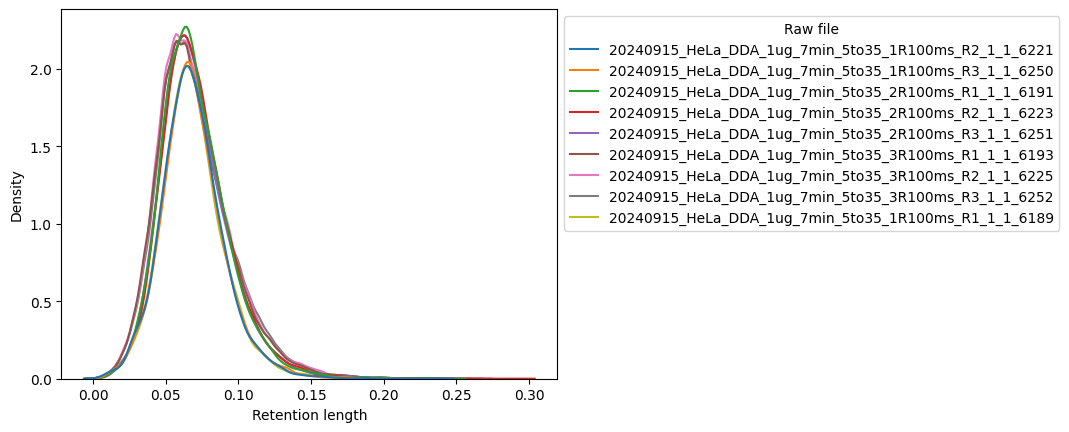

In [101]:
evidence_7min_5to35_unique_ion.loc[
    evidence_7min_5to35_unique_ion["Type"] == "TIMS-MULTI-MSMS"
].groupby(["Raw file", "Type"])["Retention length"].describe()
import seaborn as sns

import seaborn as sns
import matplotlib.pyplot as plt

# Create the KDE plot
ax = sns.kdeplot(
    evidence_7min_5to35_unique_ion.loc[
        evidence_7min_5to35_unique_ion["Type"] == "TIMS-MULTI-MSMS"
    ],
    x="Retention length",
    hue="Raw file",
    legend=True,
    # fill=True,
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## 30min_3to45

In [20]:
evidence_30min_3to45 = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/short_gradient/HeLa/30min_3to45/txt_30min_3to45/evidence.txt",
    sep="\t",
)
evidence_30min_3to45_unique_ion = evidence_30min_3to45.drop_duplicates(
    subset=["Modified sequence", "Charge", "Raw file", "Type"]
)
evidence_30min_3to45_unique_ion.value_counts(subset=["Raw file", "Type"])

/tmp/ipykernel_662958/3869682491.py:1: DtypeWarning: Columns (62,63,70) have mixed types. Specify dtype option on import or set low_memory=False.
  evidence_30min_3to45 = pd.read_csv(


Raw file                                               Type            
20240915_HeLa_DDA_5ug_30min_3to45_3R100ms_R3_1_1_6249  TIMS-MULTI-MSMS     42363
20240915_HeLa_DDA_5ug_30min_3to45_3R100ms_R2_1_1_6217  TIMS-MULTI-MSMS     42256
20240915_HeLa_DDA_5ug_30min_3to45_3R100ms_R1_1_1_6185  TIMS-MULTI-MSMS     41925
20240915_HeLa_DDA_5ug_30min_3to45_2R100ms_R2_1_1_6215  TIMS-MULTI-MSMS     39421
20240915_HeLa_DDA_5ug_30min_3to45_2R100ms_R3_1_1_6247  TIMS-MULTI-MSMS     39149
20240915_HeLa_DDA_5ug_30min_3to45_2R100ms_R1_1_1_6183  TIMS-MULTI-MSMS     39078
20240915_HeLa_DDA_5ug_30min_3to45_1R100ms_R2_1_1_6213  TIMS-MULTI-MSMS     33130
20240915_HeLa_DDA_5ug_30min_3to45_1R100ms_R3_1_1_6245  TIMS-MULTI-MSMS     33006
20240915_HeLa_DDA_5ug_30min_3to45_1R100ms_R1_1_1_6181  TIMS-MULTI-MSMS     32899
20240915_HeLa_DDA_5ug_30min_3to45_1R100ms_R3_1_1_6245  TIMS-MULTI-MATCH        4
20240915_HeLa_DDA_5ug_30min_3to45_2R100ms_R2_1_1_6215  TIMS-MULTI-MATCH        4
20240915_HeLa_DDA_5ug_30min_3to45_2R1

Text(0.5, 1.0, '30 minutes, TIMS-MULTI-MATCH')

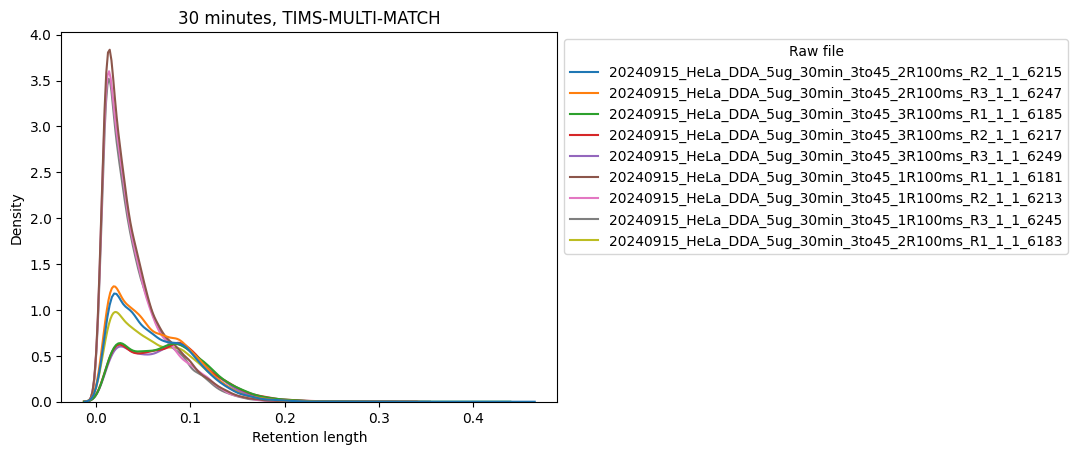

In [28]:
import seaborn as sns

type = "TIMS-MULTI-MATCH"
ax = sns.kdeplot(
    evidence_30min_3to45.loc[evidence_30min_3to45["Type"] == type],
    x="Retention length",
    hue="Raw file",
    legend=True,
    common_norm=True,
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title(f"30 minutes, {type}")

Text(0.5, 1.0, '30 minutes, TIMS-MULTI-MSMS')

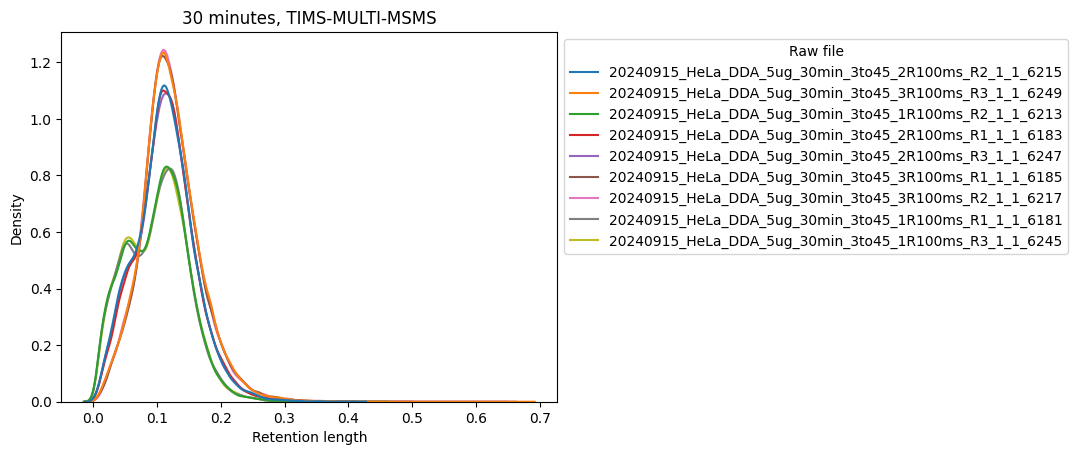

In [29]:
import seaborn as sns

type = "TIMS-MULTI-MSMS"
ax = sns.kdeplot(
    evidence_30min_3to45.loc[evidence_30min_3to45["Type"] == "TIMS-MULTI-MSMS"],
    x="Retention length",
    hue="Raw file",
    legend=True,
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title(f"30 minutes, {type}")

## 30min_5to35

In [38]:
evidence_30min_5to35 = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/short_gradient/HeLa/30min_5to35/txt_30min_5to35/evidence.txt",
    sep="\t",
)
evidence_30min_5to35_unique_ion = evidence_30min_5to35.drop_duplicates(
    subset=["Modified sequence", "Charge", "Raw file", "Type"]
)
evidence_30min_5to35_unique_ion.value_counts(subset=["Raw file", "Type"])

/tmp/ipykernel_559453/179269877.py:1: DtypeWarning: Columns (4,5,62,63,70) have mixed types. Specify dtype option on import or set low_memory=False.
  evidence_30min_5to35 = pd.read_csv(


Raw file                                               Type            
20240915_HeLa_DDA_5ug_30min_5to35_3R100ms_R2_1_1_6211  TIMS-MULTI-MSMS     41397
20240915_HeLa_DDA_5ug_30min_5to35_3R100ms_R3_1_1_6243  TIMS-MULTI-MSMS     41384
20240915_HeLa_DDA_5ug_30min_5to35_3R100ms_R1_1_1_6179  TIMS-MULTI-MSMS     41309
20240915_HeLa_DDA_5ug_30min_5to35_2R100ms_R3_1_1_6241  TIMS-MULTI-MSMS     38368
20240915_HeLa_DDA_5ug_30min_5to35_2R100ms_R1_1_1_6177  TIMS-MULTI-MSMS     38278
20240915_HeLa_DDA_5ug_30min_5to35_2R100ms_R2_1_1_6209  TIMS-MULTI-MSMS     38008
20240915_HeLa_DDA_5ug_30min_5to35_1R100ms_R1_1_1_6175  TIMS-MULTI-MSMS     32571
20240915_HeLa_DDA_5ug_30min_5to35_1R100ms_R3_1_1_6239  TIMS-MULTI-MSMS     32298
20240915_HeLa_DDA_5ug_30min_5to35_1R100ms_R2_1_1_6207  TIMS-MULTI-MSMS     32227
20240915_HeLa_DDA_5ug_30min_5to35_2R100ms_R1_1_1_6177  TIMS-MULTI-MATCH        4
20240915_HeLa_DDA_5ug_30min_5to35_2R100ms_R2_1_1_6209  TIMS-MULTI-MATCH        4
20240915_HeLa_DDA_5ug_30min_5to35_1R1

In [39]:
evidence_30min_5to35_one_raw_file = evidence_30min_5to35.loc[
    evidence_30min_5to35["Raw file"]
    == "20240915_HeLa_DDA_5ug_30min_5to35_3R100ms_R2_1_1_6211"
]

Text(0.5, 0, 'Number of MS2 per duty cycle')

Text(0, 0.5, 'Median retention length (min)')

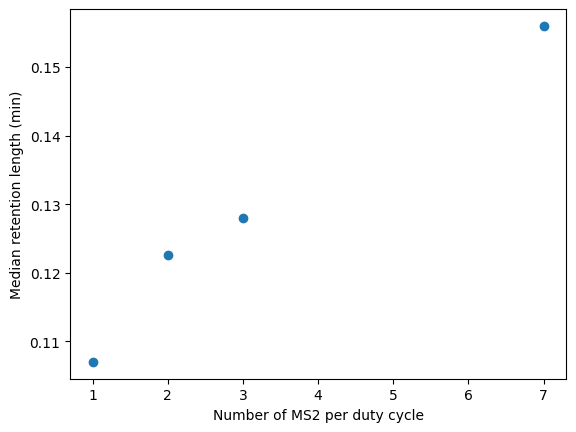

In [71]:
import matplotlib.pyplot as plt

plt.scatter(x=[7, 3, 2, 1], y=[0.156, 0.128, 0.1226, 0.107])
plt.xlabel("Number of MS2 per duty cycle")
plt.ylabel("Median retention length (min)")

In [74]:
evidence_30min_5to35_unique_ion.loc[
    evidence_30min_5to35_unique_ion["Type"] == "TIMS-MULTI-MSMS"
].groupby(["Raw file", "Type"])["Retention length"].describe()

,,count,mean,std,min,25%,50%,75%,max
Raw file,Type,,,,,,,,
20240915_HeLa_DDA_5ug_30min_5to35_1R100ms_R1_1_1_6175,TIMS-MULTI-MSMS,32571.0,0.104536,0.052335,0.003551,0.060443,0.10669,0.14221,0.39114
20240915_HeLa_DDA_5ug_30min_5to35_1R100ms_R2_1_1_6207,TIMS-MULTI-MSMS,32227.0,0.103768,0.052304,0.003551,0.060425,0.10667,0.14219,0.57232
20240915_HeLa_DDA_5ug_30min_5to35_1R100ms_R3_1_1_6239,TIMS-MULTI-MSMS,32298.0,0.104604,0.052374,0.003551,0.060441,0.10672,0.14221,0.40172
20240915_HeLa_DDA_5ug_30min_5to35_2R100ms_R1_1_1_6177,TIMS-MULTI-MSMS,38278.0,0.119972,0.049986,0.005321,0.085349,0.12262,0.14939,0.42141
20240915_HeLa_DDA_5ug_30min_5to35_2R100ms_R2_1_1_6209,TIMS-MULTI-MSMS,38008.0,0.119635,0.049751,0.005316,0.085342,0.12261,0.14937,0.45329
20240915_HeLa_DDA_5ug_30min_5to35_2R100ms_R3_1_1_6241,TIMS-MULTI-MSMS,38368.0,0.120350,0.049790,0.005327,0.085392,0.12263,0.14938,0.41609
20240915_HeLa_DDA_5ug_30min_5to35_3R100ms_R1_1_1_6179,TIMS-MULTI-MSMS,41309.0,0.129978,0.049048,0.007103,0.099545,0.12798,0.15647,0.76089
20240915_HeLa_DDA_5ug_30min_5to35_3R100ms_R2_1_1_6211,TIMS-MULTI-MSMS,41397.0,0.129504,0.048579,0.007105,0.099541,0.12798,0.15646,0.48354
20240915_HeLa_DDA_5ug_30min_5to35_3R100ms_R3_1_1_6243,TIMS-MULTI-MSMS,41384.0,0.129818,0.049230,0.007105,0.099540,0.12798,0.15647,0.64714


/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


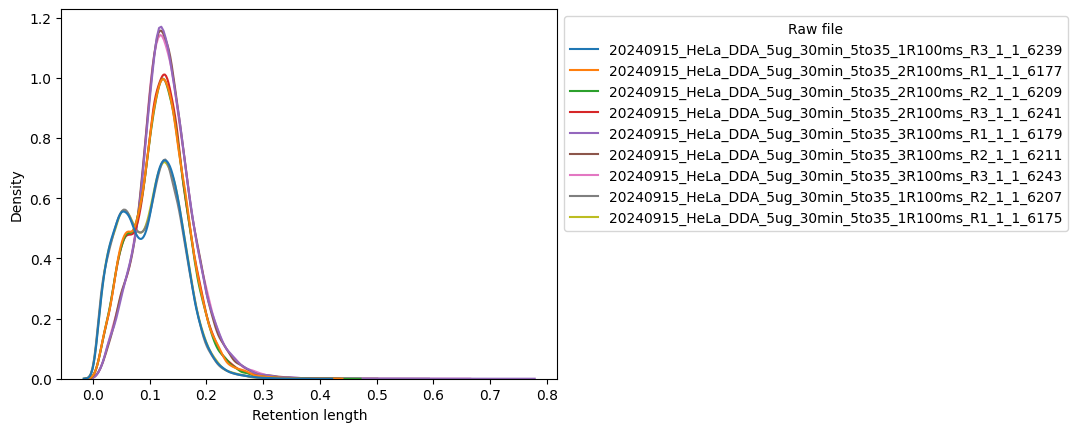

In [102]:
import seaborn as sns

ax = sns.kdeplot(
    evidence_30min_5to35_unique_ion.loc[
        evidence_30min_5to35_unique_ion["Type"] == "TIMS-MULTI-MSMS"
    ],
    x="Retention length",
    hue="Raw file",
    legend=True,
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/tmp/ipykernel_559453/1558875250.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Retention length', ylabel='Density'>

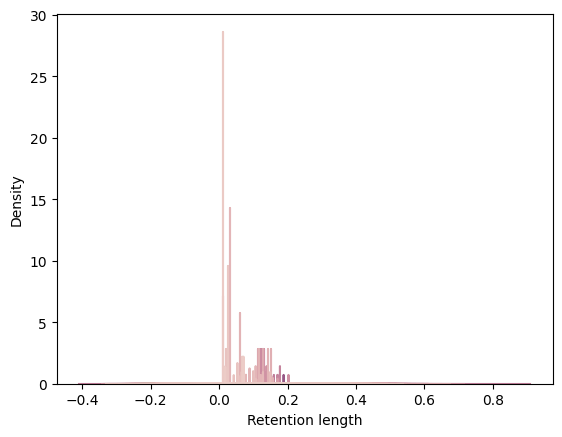

In [84]:
sns.kdeplot(
    evidence_30min_5to35_unique_ion.loc[
        (evidence_30min_5to35_unique_ion["Type"] == "TIMS-MULTI-MSMS")
        & (
            evidence_30min_5to35_unique_ion["Raw file"]
            == "20240915_HeLa_DDA_5ug_30min_5to35_1R100ms_R1_1_1_6175"
        )
    ],
    x="Retention length",
    hue="Score",
    legend=False,
)

/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Retention length', ylabel='Density'>

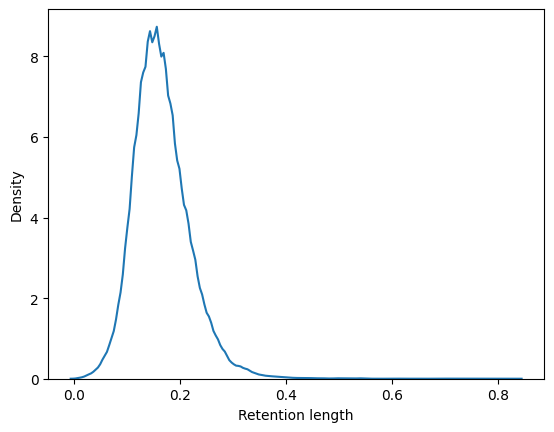

In [78]:
sns.kdeplot(
    evidence_30min_1ug_new_column_unique_ion,
    x="Retention length",
    hue="Raw file",
    legend=False,
)

## 30min low flow 2ug old column

In [57]:
evidence_30min_low_flow_2ug_old_column = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/tims_ramp_time/combined_30min_gradient/txt/evidence.txt",
    sep="\t",
)
evidence_30min_low_flow_2ug_old_column_unique_ion = (
    evidence_30min_low_flow_2ug_old_column.drop_duplicates(
        subset=["Modified sequence", "Charge", "Raw file", "Type"]
    )
)
evidence_30min_low_flow_2ug_old_column_unique_ion.value_counts(
    subset=["Raw file", "Type"]
)

/tmp/ipykernel_559453/2767138146.py:1: DtypeWarning: Columns (62,70) have mixed types. Specify dtype option on import or set low_memory=False.
  evidence_30min_low_flow_2ug_old_column = pd.read_csv(


Raw file                                                      Type           
Hela2ug_lowflow_30min_1to37to42_NCE29to59_140ms7R_RA2_1_2086  TIMS-MULTI-MSMS    40354
Hela2ug_lowflow_30min_1to37to42_NCE29to59_120ms7R_RA2_1_2082  TIMS-MULTI-MSMS    40154
Hela2ug_lowflow_30min_1to37to42_NCE29to59_100ms7R_RA2_1_2078  TIMS-MULTI-MSMS    37815
Hela2ug_lowflow_30min_1to37to42_NCE29to59_160ms7R_RA2_1_2091  TIMS-MULTI-MSMS    34956
Hela2ug_lowflow_30min_1to37to42_NCE29to59_80ms7R_RA2_1_2075   TIMS-MULTI-MSMS    34604
Name: count, dtype: int64

In [55]:
evidence_30min_low_flow_2ug_old_column_one_raw_file = (
    evidence_30min_low_flow_2ug_old_column.loc[
        evidence_30min_low_flow_2ug_old_column["Raw file"]
        == "Hela2ug_lowflow_30min_1to37to42_NCE29to59_100ms7R_RA2_1_2078"
    ]
)
evidence_30min_low_flow_2ug_old_column_one_raw_file.loc[
    evidence_30min_low_flow_2ug_old_column_one_raw_file["Type"] == "TIMS-MULTI-MSMS",
    "Retention length",
].describe()

## 30min 1ug new column

In [58]:
evidence_30min_1ug_new_column = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/HeLa_sample_amount_and_LC_columns/MQ_search/txt_30min_LC_gradient/evidence.txt",
    sep="\t",
)
evidence_30min_1ug_new_column_unique_ion = (
    evidence_30min_1ug_new_column.drop_duplicates(
        subset=["Modified sequence", "Charge", "Raw file", "Type"]
    )
)
evidence_30min_1ug_new_column_unique_ion.value_counts(subset=["Raw file", "Type"])

/tmp/ipykernel_559453/1438219135.py:1: DtypeWarning: Columns (69) have mixed types. Specify dtype option on import or set low_memory=False.
  evidence_30min_1ug_new_column = pd.read_csv(


Raw file                                               Type           
20240915_HeLa_DDA_1ug_30min_3to45_7R100ms_R2_1_1_6219  TIMS-MULTI-MSMS    32180
Name: count, dtype: int64

In [59]:
evidence_30min_1ug_new_column_unique_ion["Retention length"].describe()

count    32180.000000
mean         0.165862
std          0.053404
min          0.014209
25%          0.128020
50%          0.156480
75%          0.199070
max          0.824920
Name: Retention length, dtype: float64

## 30min various sample amount

In [60]:
evidence_30min_sample_amount_old_column = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/HeLa_sample_amount_and_LC_columns/MQ_search/txt_30min_sample_amount/evidence.txt",
    sep="\t",
)
evidence_30min_sample_amount_old_column_unique_ion = (
    evidence_30min_sample_amount_old_column.drop_duplicates(
        subset=["Modified sequence", "Charge", "Raw file", "Type"]
    )
)
evidence_30min_sample_amount_old_column_unique_ion.value_counts(
    subset=["Raw file", "Type"]
)

/tmp/ipykernel_559453/260489792.py:1: DtypeWarning: Columns (61) have mixed types. Specify dtype option on import or set low_memory=False.
  evidence_30min_sample_amount_old_column = pd.read_csv(


Raw file                            Type            
Hela_8ug_30min_Fresh_7R_RA1_1_5215  TIMS-MULTI-MSMS     53275
Hela_30min_5ug_R2_RA1_1_5163        TIMS-MULTI-MSMS     51856
Hela_30min_2ug_R1_RA1_1_5159        TIMS-MULTI-MSMS     43349
                                    TIMS-MULTI-MATCH        3
Hela_30min_5ug_R2_RA1_1_5163        TIMS-MULTI-MATCH        3
Hela_8ug_30min_Fresh_7R_RA1_1_5215  TIMS-MULTI-MATCH        3
Name: count, dtype: int64

In [63]:
evidence_30min_sample_amount_old_column_unique_ion.groupby(["Raw file", "Type"])[
    "Retention length"
].median()

Raw file                            Type            
Hela_30min_2ug_R1_RA1_1_5159        TIMS-MULTI-MATCH    0.14259
                                    TIMS-MULTI-MSMS     0.15680
Hela_30min_5ug_R2_RA1_1_5163        TIMS-MULTI-MATCH    0.14249
                                    TIMS-MULTI-MSMS     0.17085
Hela_8ug_30min_Fresh_7R_RA1_1_5215  TIMS-MULTI-MATCH    0.14243
                                    TIMS-MULTI-MSMS     0.17096
Name: Retention length, dtype: float64

In [12]:
evidence_7min_5to30 = pd.read_csv(
    "/mnt/kusterlab/file_exchange/forCory/fromJohanna/HeLa_1to3MS2/7min_5to30/txt_7min_5to30/evidence.txt",
    sep="\t",
)
evidence_7min_5to30 = evidence_7min_5to30.drop_duplicates(
    subset=["Modified sequence", "Charge", "Raw file", "Type"]
)
evidence_7min_5to30.value_counts(subset=["Raw file", "Type"])

/tmp/ipykernel_48014/3950878732.py:1: DtypeWarning: Columns (4,5,62,63,70) have mixed types. Specify dtype option on import or set low_memory=False.
  evidence_7min_5to30 = pd.read_csv(


Raw file                                            
20240915_HeLa_DDA_1ug_7min_5to30_3R100ms_R2_1_1_6231    15990
20240915_HeLa_DDA_1ug_7min_5to30_3R100ms_R3_1_1_6255    15802
20240915_HeLa_DDA_1ug_7min_5to30_3R100ms_R1_1_1_6199    15766
20240915_HeLa_DDA_1ug_7min_5to30_2R100ms_R2_1_1_6229    14917
20240915_HeLa_DDA_1ug_7min_5to30_2R100ms_R1_1_1_6197    14835
20240915_HeLa_DDA_1ug_7min_5to30_2R100ms_R3_1_1_6254    14614
20240915_HeLa_DDA_1ug_7min_5to30_1R100ms_R2_1_1_6227    12365
20240915_HeLa_DDA_1ug_7min_5to30_1R100ms_R1_1_1_6195    12208
20240915_HeLa_DDA_1ug_7min_5to30_1R100ms_R3_1_1_6253    12139
Name: count, dtype: int64

# Summary

<Axes: xlabel='MS', ylabel='Peptide sequences identified'>

(0.0, 2511.8)

(0.0, 16558.15)

Text(0.5, 1.0, '7.5 minute LC gradient')

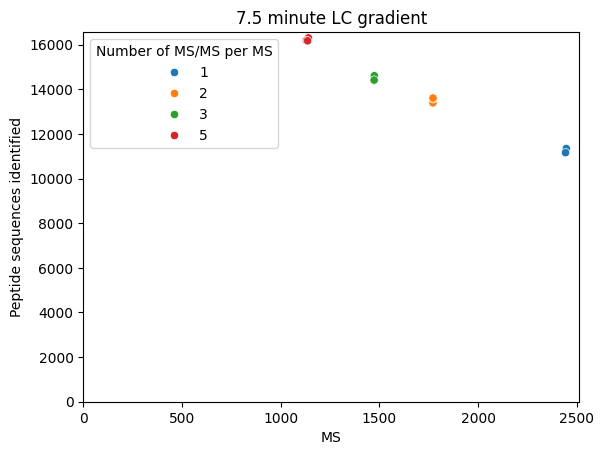

In [46]:
summary_7min_5to30 = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/short_gradient/HeLa/7min_5to30/txt_7min_5to30/summary.txt",
    sep="\t",
)
summary_7min_5to30["Number of MS/MS per MS"] = summary_7min_5to30["Experiment"].str[0]

summary_7min_ref = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/HeLa_sample_amount_and_LC_columns/7min_1ug_ref/txt/summary.txt",
    sep="\t",
)
summary_7min_ref["Number of MS/MS per MS"] = "5"
summary_7min_5to30 = pd.concat(
    [summary_7min_5to30[0:-1], summary_7min_ref[0:-1]], axis=0
)
summary_7min_5to30["LC length"] = "7.5 minutes"

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    data=summary_7min_5to30,
    x="MS",
    y="Peptide sequences identified",
    hue="Number of MS/MS per MS",
    hue_order=["1", "2", "3", "5"],
)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.title("7.5 minute LC gradient")

<Axes: xlabel='MS', ylabel='Peptide sequences identified'>

(0.0, 4688.05)

(0.0, 31124.15)

Text(0.5, 1.0, '15 minute LC gradient')

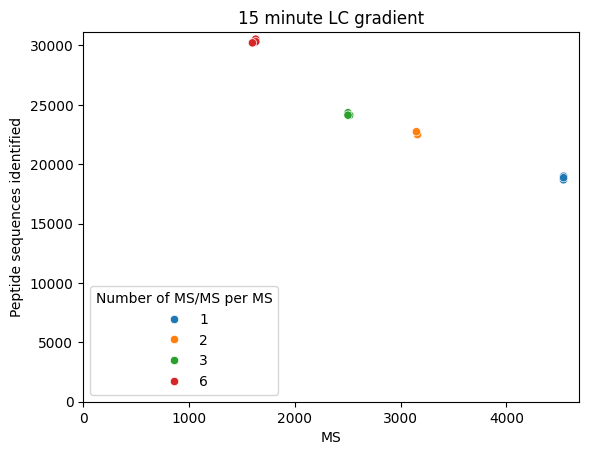

In [4]:
### Summary
summary_15min_5to35 = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/short_gradient/HeLa/15min_5to35/txt_15min_5to35/summary.txt",
    sep="\t",
)
summary_15min_5to35["Number of MS/MS per MS"] = summary_15min_5to35["Experiment"].str[0]
summary_15min_ref = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/HeLa_sample_amount_and_LC_columns/15min_2ug_ref/txt/summary.txt",
    sep="\t",
)
summary_15min_ref["Number of MS/MS per MS"] = "6"
summary_15min_5to35 = pd.concat(
    [summary_15min_5to35.iloc[:-1, :], summary_15min_ref.iloc[:-1, :]], axis=0
)
summary_15min_5to35["LC length"] = "15 minutes"
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    data=summary_15min_5to35,
    x="MS",
    y="Peptide sequences identified",
    hue="Number of MS/MS per MS",
    hue_order=["1", "2", "3", "6"],
)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.title("15 minute LC gradient")

<Axes: xlabel='MS', ylabel='Peptide sequences identified'>

(0.0, 9039.8)

(0.0, 48043.05)

Text(0.5, 1.0, '30 minute LC gradient')

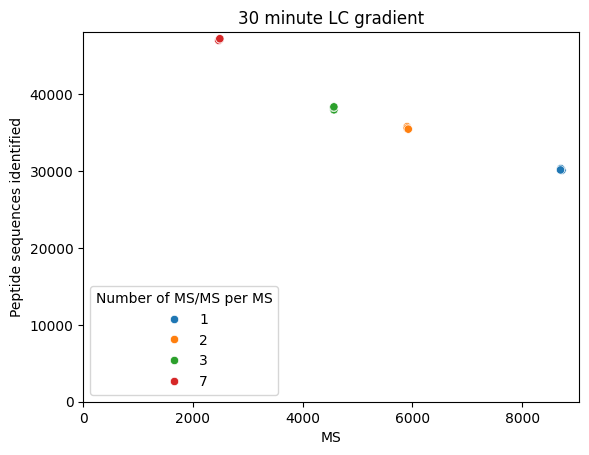

In [5]:
summary_30min_3to45 = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/short_gradient/HeLa/30min_3to45/txt_30min_3to45/summary.txt",
    sep="\t",
)
summary_30min_3to45["Number of MS/MS per MS"] = summary_30min_3to45["Experiment"].str[0]
summary_30min_ref = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/HeLa_sample_amount_and_LC_columns/30min_5ug_ref/txt/summary.txt",
    sep="\t",
)
summary_30min_ref["Number of MS/MS per MS"] = "7"
summary_30min_3to45 = pd.concat(
    [summary_30min_3to45.iloc[0:9,], summary_30min_ref.iloc[0:-1]], axis=0
)
summary_30min_3to45["LC length"] = "30 minutes"
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    data=summary_30min_3to45,
    x="MS",
    y="Peptide sequences identified",
    hue="Number of MS/MS per MS",
    hue_order=["1", "2", "3", "7"],
)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.title("30 minute LC gradient")

In [6]:
summary_all = pd.concat(
    [
        summary_15min_5to35,
        summary_7min_5to30,
        summary_30min_3to45,
    ],
    axis=0,
)

In [7]:
summary_exp = pd.read_csv(
    "/cmnfs/proj/ORIGINS/SWAPS_exp/short_gradient/SWAPS_setup_and_gain_of_precursors.csv"
)
summary_exp = pd.merge(
    summary_exp,
    summary_all[
        [
            "Raw file",
            "MS",
            "Peptide sequences identified",
            "Number of MS/MS per MS",
        ]
    ],
    left_on="Raw file name",
    right_on="Raw file",
)

In [76]:
summary_exp_long = pd.melt(
    summary_exp,
    id_vars=[
        "Raw file name",
        "LC Length (min)",
        "Raw file #MSMS/duty cycle (R)",
        "Raw file",
        "MS",
        "Number of MS/MS per MS",
    ],
    value_vars=["120-min library, total", "MaxQuant #ID", "30-min library, total"],
    var_name="Methods",
    value_name="Number of precursors identified",
)
import pandas as pd
from utils.plot import save_plot

plt.figure(figsize=(10, 6))
plt.rc("font", size=12)
ax = sns.scatterplot(
    data=summary_exp_long,
    y="Number of precursors identified",
    x="MS",
    # hue="Number of MS/MS per MS",
    hue="LC Length (min)",
    hue_order=[7.5, 15, 30],
    s=70,
    style="Methods",
    style_order=["MaxQuant #ID", "120-min library, total", "30-min library, total"],
    palette={7.5: "green", 15: "orange", 30: "blue"},
    # hue_order=["1", "2", "3", "5", "6", "7"],
)
# Retrieve the handles and labels from the plot
handles, labels = ax.get_legend_handles_labels()
# Place the legend outside the plot
plt.legend(
    handles=handles,
    labels=labels,
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.0,
)

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xlabel("Total number of MS1 acquired")

save_plot(
    save_dir="/cmnfs/proj/ORIGINS/SWAPS_exp/SWAPS_paper_figures/",
    fig_type_name="summary",
    fig_spec_name="SWAPS_setup_and_gain_of_precursors_all_setups",
)

<Figure size 1000x600 with 0 Axes>

(0.0, 9084.3)

(0.0, 78718.85)

Text(0.5, 0, 'Total number of MS1 acquired')

2024-10-17 11:21:51,393 - utils.plot - INFO - Save plot at /cmnfs/proj/ORIGINS/SWAPS_exp/SWAPS_paper_figures/summary_SWAPS_setup_and_gain_of_precursors_all_setups.png
2024-10-17 11:21:51,657 - utils.plot - INFO - Save plot at /cmnfs/proj/ORIGINS/SWAPS_exp/SWAPS_paper_figures/summary_SWAPS_setup_and_gain_of_precursors_all_setups.svg


(0.0, 2559.6)

(0.0, 78458.55)

Text(0.5, 0, 'Total number of MS1 acquired')

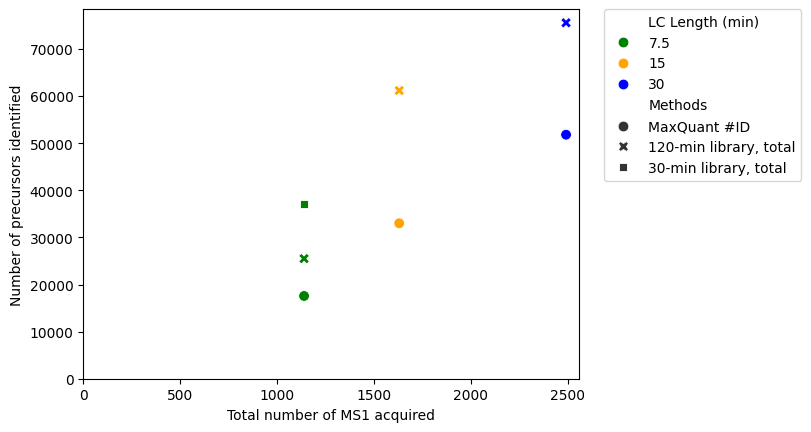

In [23]:
ax = sns.scatterplot(
    data=summary_exp_long.loc[
        summary_exp_long["Number of MS/MS per MS"].isin(["7", "6", "5"])
    ],
    y="Number of precursors identified",
    x="MS",
    # hue="Number of MS/MS per MS",
    hue="LC Length (min)",
    hue_order=[7.5, 15, 30],
    s=60,
    style="Methods",
    style_order=["MaxQuant #ID", "120-min library, total", "30-min library, total"],
    palette={7.5: "green", 15: "orange", 30: "blue"},
    # hue_order=["1", "2", "3", "5", "6", "7"],
)
# Retrieve the handles and labels from the plot
handles, labels = ax.get_legend_handles_labels()
# Place the legend outside the plot
plt.legend(
    handles=handles,
    labels=labels,
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.0,
)

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xlabel("Total number of MS1 acquired")

for fig_format in ["svg", "png"]:
    plt.savefig(
        os.path.join(
            "/cmnfs/proj/ORIGINS/SWAPS_exp/SWAPS_paper_figures/",
            f"SWAPS_setup_and_gain_of_precursors_normal_setup.{fig_format}",
        ),
        dpi=300,
        bbox_inches="tight",
    )

(0.0, 2511.3)

(0.0, 38316.95)

Text(0.5, 0, 'Number of MS')

Text(0.5, 1.0, '7.5 minute LC gradient with different libraries')

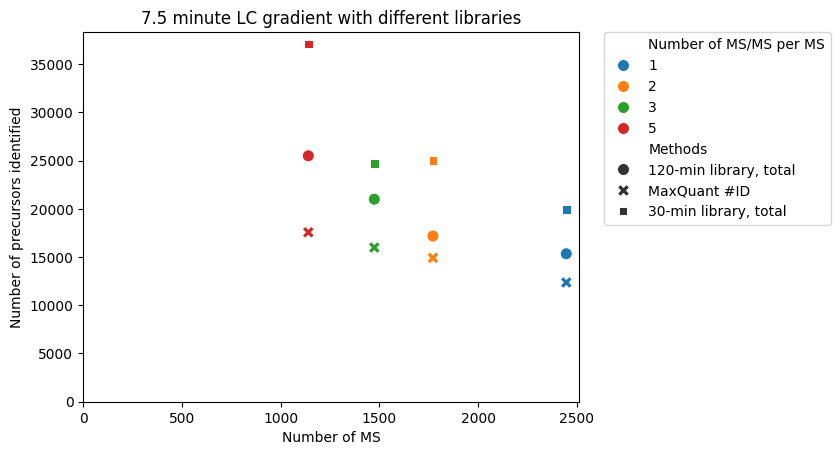

In [34]:
summary_exp_7min_long = pd.melt(
    summary_exp.loc[summary_exp["LC Length (min)"] == 7.5],
    id_vars=[
        "Raw file name",
        "LC Length (min)",
        "Raw file #MSMS/duty cycle (R)",
        "Raw file",
        "MS",
        "Number of MS/MS per MS",
    ],
    value_vars=["120-min library, total", "MaxQuant #ID", "30-min library, total"],
    var_name="Methods",
    value_name="Number of precursors identified",
)
import pandas as pd


ax = sns.scatterplot(
    data=summary_exp_7min_long,
    y="Number of precursors identified",
    x="MS",
    hue="Number of MS/MS per MS",
    # size="LC Length (min)",
    style="Methods",
    s=75,
    # size_order=[7.5],
    hue_order=["1", "2", "3", "5"],
)

# Retrieve the handles and labels from the plot
handles, labels = ax.get_legend_handles_labels()
# Place the legend outside the plot
plt.legend(
    handles=handles,
    labels=labels,
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.0,
)

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xlabel("Number of MS")
plt.title("7.5 minute LC gradient with different libraries")

In [24]:
23760 / (44966 + 6353)
28179 / (28889 + 3803)
19513 / (15611 + 1791)

0.4629864182856252

0.8619539948611281

1.1213078956441789

2024-10-04 09:19:25,388 - result_analysis.result_analysis - INFO - Drop na values in pept_act_sum, Pept activation sum entries: 186257
2024-10-04 09:19:25,389 - result_analysis.result_analysis - INFO - Filtering the data by the sum of intensity threshold 2, number of entries before filtering 186257
2024-10-04 09:19:25,402 - result_analysis.result_analysis - INFO - Number of entries after filtering 186257
2024-10-04 09:19:25,408 - result_analysis.result_analysis - INFO - Removing decoy entries, number of entries before filtering 186257


2024-10-04 09:19:25,417 - result_analysis.result_analysis - INFO - Number of entries after filtering 93323
2024-10-04 09:19:25,853 - result_analysis.result_analysis - INFO - Number of entries after merging 51319 and columns Index(['Sequence', 'Length', 'Modifications', 'Modified sequence',
       'Oxidation (M) Probabilities', 'Oxidation (M) Score Diffs',
       'Acetyl (Protein N-term)', 'Oxidation (M)', 'Missed cleavages',
       'Proteins',
       ...
       'IsoMZ', 'IsoAbundance', 'mz_rank', 'mz_bin', 'mz_length',
       'pept_batch_idx', 'pept_act_sum', 'Decoy_y', 'Data',
       'log_sum_intensity'],
      dtype='object', length=116)


Data:  Intensity_log pept_act_sum_log , slope =  0.459 , intercept =  2.966 , PearsonR =  0.535 , SpearmanR =  0.484


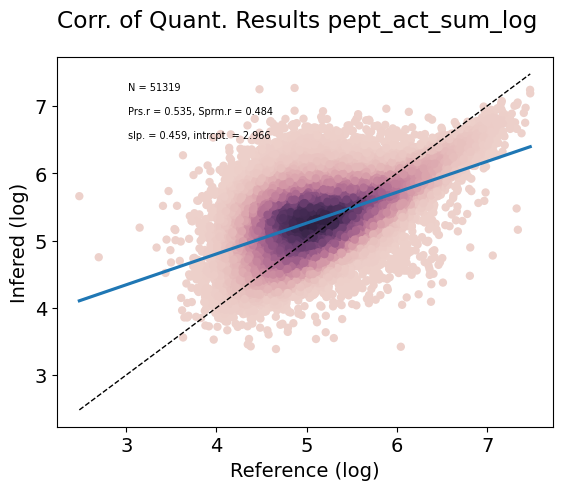

In [ ]:
from result_analysis import result_analysis

swaps_result = result_analysis.SWAPSResult(
    maxquant_dict=maxquant_result_ref,
    pept_act_sum_df=pept_act_sum_df_full,
    infer_intensity_col="pept_act_sum",
    fdr_thres=None,
    log_sum_intensity_thres=2,
    # save_dir=eval_dir,
)
swaps_result.plot_intensity_corr(contour=False)

# Check activation image and label

In [3]:
swaps_config_path = "/cmnfs/proj/ORIGINS/SWAPS_exp/short_gradient/15min_120min_lib_im_ref_20240924_090712_523653/config_20240925_092450_288941.yaml"
from utils.config import get_cfg_defaults
from utils.singleton_swaps_optimization import swaps_optimization_cfg

cfg = get_cfg_defaults(swaps_optimization_cfg)
cfg.merge_from_file(swaps_config_path)

In [4]:
from peak_detection_2d.utils import plot_data_points
from peak_detection_2d.dataset.dataset import MultiHDF5_MaskDataset

cfg_peak_selection = cfg.PEAK_SELECTION
from peak_detection_2d.dataset.dataset import build_transformation

hdf5_files = [
    "/cmnfs/proj/ORIGINS/SWAPS_exp/short_gradient/7min_30min_lib_im_ref_20240924_091634_504562/peak_selection/training_data/train_datapoints_TD_peptbatch0.hdf5",
    "/cmnfs/proj/ORIGINS/SWAPS_exp/short_gradient/7min_30min_lib_im_ref_20240924_091634_504562/peak_selection/training_data/train_datapoints_TD_peptbatch1.hdf5",
    "/cmnfs/proj/ORIGINS/SWAPS_exp/short_gradient/7min_30min_lib_im_ref_20240924_091634_504562/peak_selection/training_data/train_datapoints_TD_peptbatch2.hdf5",
    "/cmnfs/proj/ORIGINS/SWAPS_exp/short_gradient/7min_30min_lib_im_ref_20240924_091634_504562/peak_selection/training_data/train_datapoints_TD_peptbatch3.hdf5",
    "/cmnfs/proj/ORIGINS/SWAPS_exp/short_gradient/7min_30min_lib_im_ref_20240924_091634_504562/peak_selection/training_data/train_datapoints_TD_peptbatch4.hdf5",
]
transformation, cfg_peak_selection.DATASET = build_transformation(
    cfg_peak_selection.DATASET
)
dataset = MultiHDF5_MaskDataset(
    hdf5_files,
    use_hint_channel=True,
    transforms=transformation,
)

/cmnfs/home/z.xiao/miniconda3/envs/sbs/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-09-25 13:55:19,385 - peak_detection_2d.dataset.dataset - INFO - Transformation: [<peak_detection_2d.dataset.dataset.Mask_Resize object at 0x7fb043deb490>, <peak_detection_2d.dataset.dataset.Mask_AddLogChannel object at 0x7faeffe535e0>, <peak_detection_2d.dataset.dataset.Mask_AddHintChannel object at 0x7faeffe53ac0>, <peak_detection_2d.dataset.dataset.Mask_MinMaxScale object at 0x7faeffe53b80>]


In [24]:
label

{'mask': Image([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], dtype=torch.float64, ),
 'pept_mz_rank': 10027,
 'iscrowd': tensor([0]),
 'target': 1,
 'ori_image_raw': Image([[[0.0000, 6.1998, 1.8485,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 5.1184, 1.5261,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 2.3309, 0.6950,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
       dtype=torch.float64, )}

2024-09-25 14:12:48,557 - root - INFO - Is target: 1
2024-09-25 14:12:48,558 - root - INFO - Image shape in initial dataset: torch.Size([3, 258, 258])
2024-09-25 14:12:48,586 - peak_detection_2d.utils - INFO - hint channel sum: 1145.0
2024-09-25 14:12:48,587 - peak_detection_2d.utils - INFO - hint channel non zero values: tensor([  3., 140.,   7., 370.,   8., 421.,   4., 192.], dtype=torch.float64)
2024-09-25 14:12:48,591 - matplotlib.legend - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


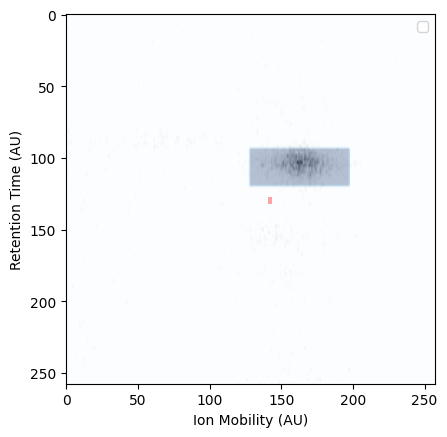

In [36]:
%matplotlib inline
# # sanity check


image, hint, label = dataset[19670]
logging.info("Is target: %s", label["target"])
logging.info("Image shape in initial dataset: %s", image.shape)
to_plot = {"data": image[0].cpu(), "hint_channel": image[2].cpu(), "mask": label['mask'][0].cpu()}
plot_data_points(dp_dict=to_plot, label = "mask")

# Result analysis for 7min

In [35]:
swaps_config_path = "/cmnfs/proj/ORIGINS/SWAPS_exp/short_gradient/7min_30min_lib_im_ref_20240924_091634_504562/config_cls_with_seg_output_dropout.yaml"
ps_dir = "cls_with_seg_output_dropout"

In [36]:
%autoreload 2
from utils.config import get_cfg_defaults
from utils.singleton_swaps_optimization import swaps_optimization_cfg

cfg = get_cfg_defaults(swaps_optimization_cfg)
cfg.merge_from_file(swaps_config_path)


In [37]:
cfg.PEAK_SELECTION.merge_from_file(
    os.path.join(
        cfg.RESULT_PATH, "peak_selection", ps_dir, "updated_peak_selection_config.yaml"
    )
)

In [38]:
maxquant_result_ref = pd.read_pickle(cfg.DICT_PICKLE_PATH)

mobility_values_df = pd.read_csv(os.path.join(cfg.RESULT_PATH, "mobility_values.csv"))
ms1scans = pd.read_csv(os.path.join(cfg.RESULT_PATH, "ms1scans.csv"))

In [39]:
from result_analysis import result_analysis

ps_exp_dir = os.path.join(
    cfg.RESULT_PATH, "peak_selection", cfg.PEAK_SELECTION.EXP_DIR_NAME
)

In [40]:
%autoreload 2
from peak_detection_2d.utils import plot_target_decoy_distr

pept_act_sum_ps_full = pd.read_csv(os.path.join(ps_exp_dir, "pept_act_sum_ps.csv"))
pept_act_sum_ps_full = pd.merge(
    left=pept_act_sum_ps_full,
    right=maxquant_result_ref[["Decoy", "mz_rank"]],
    on="mz_rank",
)
plot_target_decoy_distr(
    pept_act_sum_ps_full,
    threshold=None,
    save_dir=os.path.join(ps_exp_dir, "results"),
    dataset_name="fullset_no_filter",
    main_plot_type="scatter",
)

In [42]:
logging.info("==================Result Analaysis==================")
if cfg.PEAK_SELECTION.ENABLE:
    eval_dir = os.path.join(ps_exp_dir, "results", "evaluation")
else:
    eval_dir = os.path.join(cfg.RESULT_PATH, "results", "evaluation")
os.makedirs(eval_dir, exist_ok=True)
act_dir = os.path.join(cfg.RESULT_PATH, "results", "activation")
pept_act_sum_df = pd.read_csv(os.path.join(act_dir, "pept_act_sum.csv"))
if cfg.PEAK_SELECTION.ENABLE:
    pept_act_sum_ps = pd.read_csv(
        os.path.join(ps_exp_dir, "pept_act_sum_ps_full_tdc_fdr_thres.csv")
    )
    pept_act_sum_ps = pept_act_sum_ps.rename(
        {"sum_intensity": "sum_intensity_ps"}, axis=1
    )
    pept_act_sum_df = pd.merge(
        left=pept_act_sum_df,
        right=pept_act_sum_ps,
        on=["mz_rank"],
        how="left",
        suffixes=("", "_ps"),
    )
    infer_int_col = "sum_intensity_ps"

swaps_result = result_analysis.SWAPSResult(
    maxquant_dict=maxquant_result_ref,
    pept_act_sum_df=pept_act_sum_df,
    infer_intensity_col=infer_int_col,
    fdr_thres=0.15,
    log_sum_intensity_thres=cfg.RESULT_ANALYSIS.LOG_SUM_INTENSITY_THRESHOLD,
    save_dir=eval_dir,
    include_decoys=cfg.PREPARE_DICT.GENERATE_DECOY,
)
swaps_result.plot_intensity_corr()
swaps_result.plot_intensity_corr(contour=True)
swaps_result.plot_overlap_with_MQ(show_ref=False, level="precursor")
swaps_result.plot_overlap_with_MQ(show_ref=False, level="peptide")
swaps_result.plot_overlap_with_MQ(show_ref=False, level="protein")

2024-10-01 16:24:27,825 - root - INFO - ==================Result Analaysis==================
2024-10-01 16:24:27,919 - result_analysis.result_analysis - INFO - Drop na values in sum_intensity_ps, Pept activation sum entries: 28968
2024-10-01 16:24:27,920 - result_analysis.result_analysis - INFO - Filtering the data by the sum of intensity threshold 2, number of entries before filtering 28968
2024-10-01 16:24:27,923 - result_analysis.result_analysis - INFO - Number of entries after filtering 28968
2024-10-01 16:24:27,925 - result_analysis.result_analysis - INFO - Calculating FDR results after filter...
2024-10-01 16:24:27,928 - peak_detection_2d.utils - INFO - Number of entries before filtering: 28968
2024-10-01 16:24:27,931 - peak_detection_2d.utils - INFO - Number of entries after filtering by log_sum_intensity with condition [0, 100]: 28968
2024-10-01 16:24:30,448 - result_analysis.result_analysis - INFO - Filtering the data by FDR threshold 0.15, number of entries before filtering 2

Data:  Intensity_log sum_intensity_ps_log , slope =  1.024 , intercept =  -0.747 , PearsonR =  0.881 , SpearmanR =  0.86


2024-10-01 16:24:32,769 - result_analysis.result_analysis - INFO - Number of entries after merging 8427 and columns Index(['Unnamed: 0_x', 'Sequence', 'Length', 'Modifications',
       'Modified sequence', 'Oxidation (M) Probabilities',
       'Oxidation (M) Score Diffs', 'Acetyl (Protein N-term)', 'Oxidation (M)',
       'Missed cleavages',
       ...
       'sum_intensity_ps', 'out_score', 'target_decoy_score', 'Decoy_y',
       'TD pair id_y', 'log_sum_intensity', 'competition', 'Target', 'fdr',
       'N_identified_target'],
      dtype='object', length=125)


Data:  Intensity_log sum_intensity_ps_log , slope =  1.024 , intercept =  -0.747 , PearsonR =  0.881 , SpearmanR =  0.86


2024-10-01 16:24:41,726 - result_analysis.result_analysis - INFO - Number of proteins in Maxquant 3385
2024-10-01 16:24:41,727 - result_analysis.result_analysis - INFO - Number of proteins in SWAPS 3591
2024-10-01 16:24:41,728 - result_analysis.result_analysis - INFO - Number of proteins in both SWAPS and Maxquant 3591
2024-10-01 16:24:41,728 - result_analysis.result_analysis - INFO - Number of proteins only in SWAPS 676
